In [9]:
import math
import matplotlib.pyplot as plt
import pandas as pd
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
directory = 'results/simple_strategy/cache_capacity_2500/2019_05_15_17_32'
caching_strategy_dir = f'{directory}/caching_strategy'
eviction_strategy_dir = f'{directory}/eviction_strategy'
eviction_name = 'lru_eviction_strategy_'

In [11]:
stats_df = pd.read_csv(f'{directory}/cache_hit_logger.log', 
                       names=['timestamp', 'key', 'observation', 'episode'], 
                       usecols=['episode', 'observation', 'key'])
stats = stats_df.groupby(['episode','observation']).count().unstack(0)['key'].fillna(0).transpose()

/home/samialab/anaconda3/envs/rlcache/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


Text(0, 0.5, 'Hit Ratio')

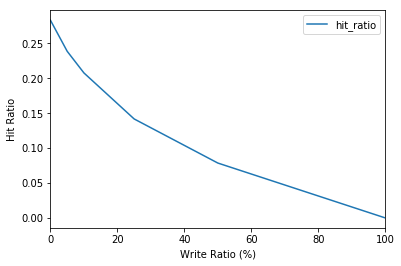

In [97]:
hit_ratio_all = stats['ObservationType.Hit']/stats.sum(axis=1)
hit_ratio_all.index  = hit_ratio_all.index - 1
test = pd.DataFrame({'write_ratio': [0, 5, 10, 25, 50, 100]})
test['hit_ratio'] = hit_ratio_all
test = test.set_index('write_ratio')
ax = test.plot()
ax.set_xlabel('Write Ratio (%)')
ax.set_ylabel('Hit Ratio')

In [104]:
eviction_performance_df = pd.read_csv(f'{eviction_strategy_dir}/{eviction_name}performance_logger.log',
                             names=['timestamp', 'episode', 'state'],
                             usecols=['timestamp','episode', 'state'])
eviction_performance = eviction_performance_df.groupby(['episode','state']).count().unstack(0)['timestamp'].fillna(0).transpose()

,timestamp,state
0,2019-05-15 17:33:11,FalseEvict
1,2019-05-15 17:33:11,FalseEvict
2,2019-05-15 17:33:11,FalseEvict
3,2019-05-15 17:33:12,FalseEvict
4,2019-05-15 17:33:12,FalseEvict
5,2019-05-15 17:33:12,FalseEvict
6,2019-05-15 17:33:12,FalseEvict
7,2019-05-15 17:33:12,FalseEvict
8,2019-05-15 17:33:12,FalseEvict
9,2019-05-15 17:33:12,FalseEvict
